In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

#### FEATURE SELECTION

Text(0.5, 1.0, 'Feature Importance')

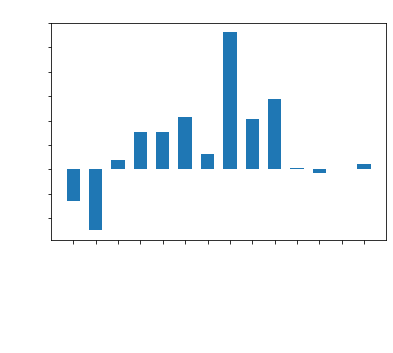

In [16]:
# Load data
orig_data = pd.read_csv('hirability_balanced_for_feature_selection.csv')
data = pd.read_csv('hirability_balanced_for_feature_selection.csv')
# clean data
data['commits'] = data['commits'].fillna(0)
# 
data = pd.get_dummies(data, drop_first=True)

column_to_move = data.pop("hirable")
data.insert(0, "hirable", column_to_move)
X = data.iloc[0:, 1:]
y = data.iloc[0:, 0:1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()  
classifier.fit(X_train, y_train) 

importances = permutation_importance(classifier, X_test, y_test)
plt.bar(data.columns.tolist()[1:], importances.importances_mean.tolist(), width=0.6)
plt.xticks(rotation='vertical', color='white')
plt.yticks(color='white')
plt.title('Feature Importance', color='white')

### BUILDING THE MODEL

#### Load and clean data

In [177]:
orig_data = pd.read_csv('hirability_balanced.csv')
data = pd.read_csv('hirability_balanced.csv')

data['commits'] = data['commits'].fillna(0)
data.pop("country")

column_to_move = data.pop("hirable")
data.insert(0, "hirable", column_to_move)

data.head()

,hirable,has_bio,has_blog,followers,followings,commits,public_gist,public_repos
0,0,0,0,9,10,12.0,0,18
1,0,0,0,0,0,5.0,0,1
2,0,0,0,1,3,36.0,0,5
3,0,0,1,9,8,55.0,1,9
4,0,0,0,3,4,0.0,0,3


#### Split data

In [178]:
X = data.iloc[0:, 1:]
y = data.iloc[0:, 0:1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

#### Train and test the model

In [179]:
classifier = BernoulliNB()  
classifier.fit(X_train, y_train)  

BernoulliNB()

In [180]:
y_pred = classifier.predict(X_test)  

In [181]:
print('Accuracy', classification_report(y_test,y_pred))

Accuracy               precision    recall  f1-score   support

           0       0.70      0.64      0.67       243
           1       0.68      0.74      0.71       257

    accuracy                           0.69       500
   macro avg       0.69      0.69      0.69       500
weighted avg       0.69      0.69      0.69       500

